<a href="https://colab.research.google.com/github/rahul1975/opencv/blob/master/Yolo_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

# New Section

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [51]:
image = cv2.imread("/content/people.jpg")

In [52]:
type(image)

numpy.ndarray

In [53]:
image.shape

(408, 612, 3)

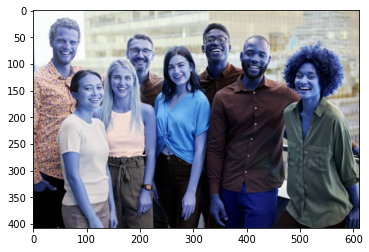

In [54]:
plt.imshow(image)

In [55]:
new_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

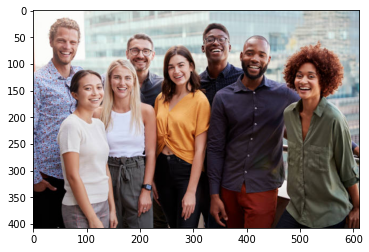

In [56]:
plt.imshow(new_image)

In [57]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")


In [58]:
classes = []
with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [59]:
len(classes)

80

In [60]:
blob = cv2.dnn.blobFromImage(image,1/255, (320,320),(0,0,0),swapRB=True, crop = False)

In [61]:
blob.shape

(1, 3, 320, 320)

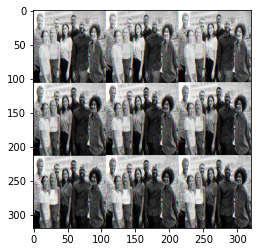

In [62]:
i= blob[0].reshape(320,320,3)
plt.imshow(i)

In [63]:
yolo.setInput(blob)

In [64]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [70]:
boxes = []
confidence = []
class_ids = []

for output in layeroutput:
  for detection in output:
    
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]

    print(score)


  if confidence > 0.7:
    center_x = int(detection[0]*width)
    center_y = int(detection[0]*height)

    w = int(detection[0]*width)
    h = int(detection[0]*height)

    x = int(center_x - w/2)
    y = int(center_y - h/2)

   

    boxes.append (float(confidence))
    class_ids.append(class_id)

Streaming output truncated to the last 5000 lines.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [66]:
len(boxes)

0